<a href="https://www.kaggle.com/code/ahmetesmer/sns-learning?scriptVersionId=112933406" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

1. [Bar plot](#1)
    * [Horizontal Bar Plot](#2)
1. [Point Plot](#3)    
1. [Joint Plot](#4)
1. [Pie Plot](#5)
1. [Lme Plot](#6)
1. [Kde Plot](#7)
1. [Violin Plot](#8)
1. [Heatmap](#9)
1. [Box Plot](#10)
1. [Swarm Plot](#11)
1. [Pair Plot](#12)
1. [Count Plot](#13)
1. [Cat plot](#14)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv
/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv
/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv
/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv
/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv


In [2]:
median_house_hold_in_come = pd.read_csv("../input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv", encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv("../input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv("../input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv", encoding="windows-1252")
share_race_city = pd.read_csv("../input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv", encoding="windows-1252")
kill = pd.read_csv("../input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv", encoding="windows-1252")

<a id = "1"></a>
# Bar Plot

In [3]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
percentage_people_below_poverty_level.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [5]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [6]:
# Data has "-" value
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64

In [7]:
percentage_people_below_poverty_level.poverty_rate.replace(["-"], 0.0 , inplace = True)

In [8]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
0.0      201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64

In [9]:
# convert from str to int
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

In [10]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [11]:
percentage_people_below_poverty_level["Geographic Area"].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [12]:
area_list = list(percentage_people_below_poverty_level["Geographic Area"].unique())

In [13]:
# Calculating the Poverty Rate Given States
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level["Geographic Area"] == i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
# sorting
data = pd.DataFrame({"area_list":area_list,"area_poverty_ratio":area_poverty_ratio})
new_index = (data["area_poverty_ratio"].sort_values(ascending = True)).index.values
sorted_data = data.reindex(new_index)

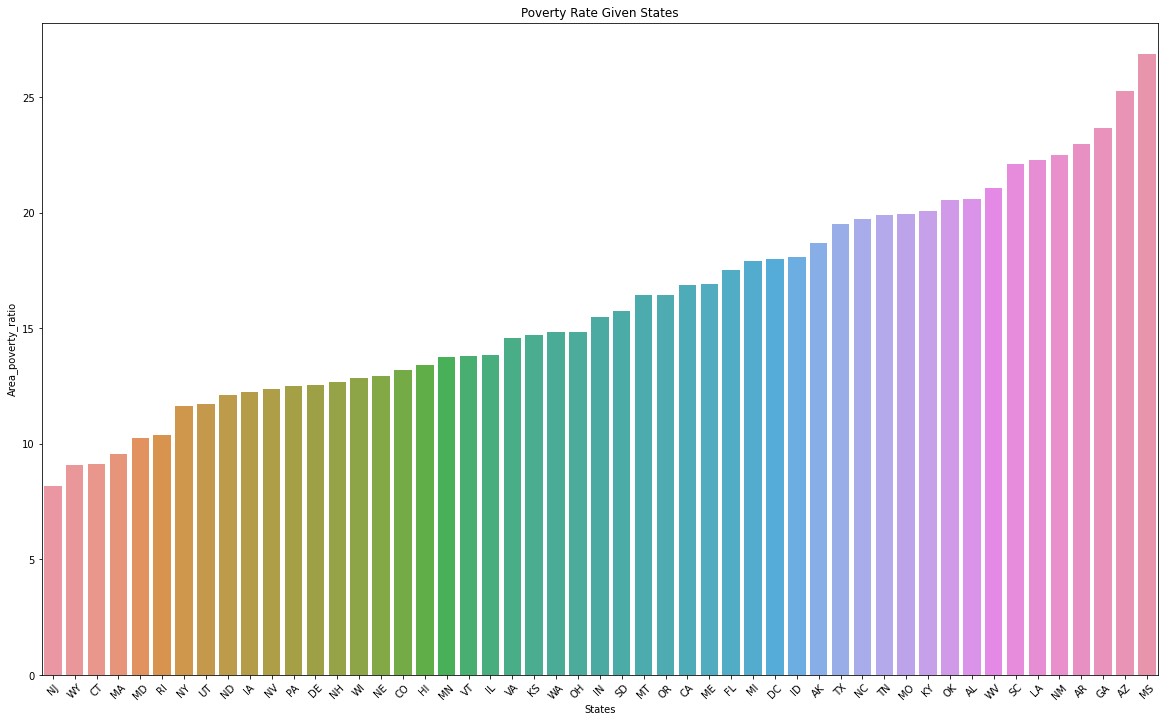

In [14]:
# visualization
plt.figure(figsize = (20,12))
sns.barplot(x = sorted_data["area_list"], y = sorted_data["area_poverty_ratio"])
plt.xticks(rotation = 45)  # yazıların açılarını ayarlar
plt.xlabel("States")
plt.ylabel("Area_poverty_ratio")
plt.title("Poverty Rate Given States")
plt.show()

# ANOTHER GRAPHIC

In [15]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [16]:
kill["name"].value_counts()

TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: name, Length: 2481, dtype: int64

In [17]:
# Finding the Most common 15 Name and Surname of Killed People
separate = kill.name[kill.name != "TK TK"].str.split()
a,b = zip(*separate)
name_list = a + b
name_count = Counter(name_list)
most_common_names = name_count.most_common(15)
x,y = zip(*most_common_names)
x,y = list(x),list(y)

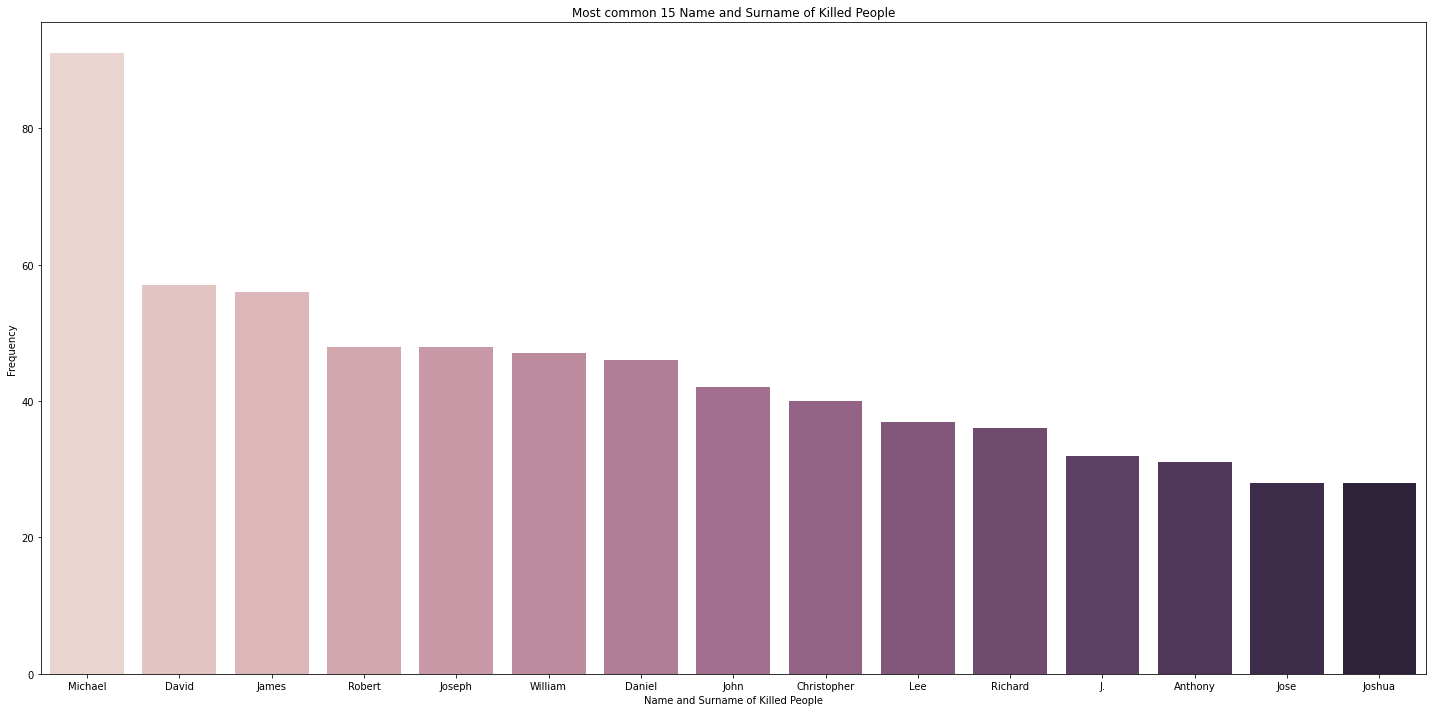

In [18]:
# visualization
plt.figure(figsize = (20,10))
ax = sns.barplot(x=x,y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel("Name and Surname of Killed People")
plt.ylabel("Frequency")
plt.title("Most common 15 Name and Surname of Killed People")
plt.tight_layout()
plt.show()

# ANOTHER GRAPHIC

In [19]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [20]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [21]:
# Data has "-" value
percent_over_25_completed_highSchool["percent_completed_hs"].value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: percent_completed_hs, Length: 728, dtype: int64

In [22]:
# Changing
percent_over_25_completed_highSchool["percent_completed_hs"].replace(["-"], 0.0 ,inplace  = True)
percent_over_25_completed_highSchool["percent_completed_hs"].value_counts()

100     1301
0.0      197
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: percent_completed_hs, Length: 728, dtype: int64

In [23]:
# object type change
percent_over_25_completed_highSchool["percent_completed_hs"] = percent_over_25_completed_highSchool["percent_completed_hs"].astype(float)
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


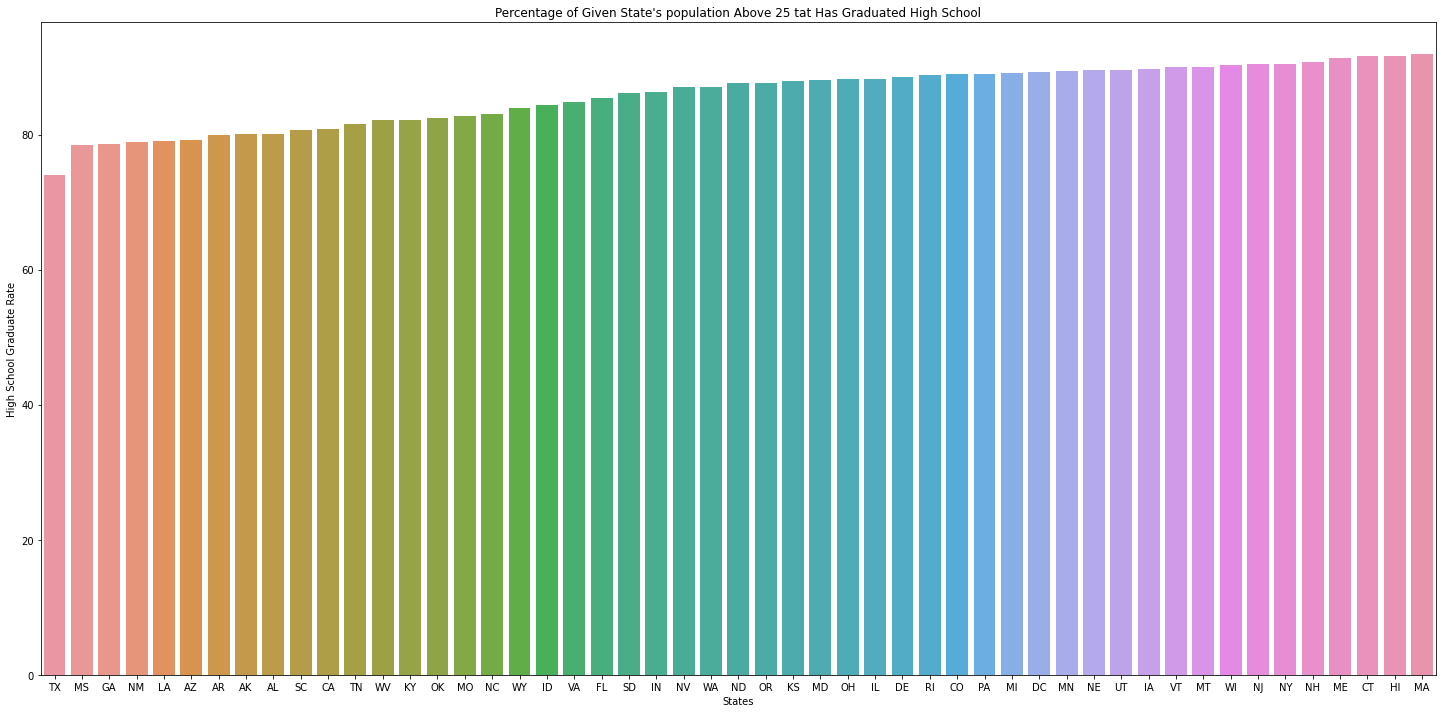

In [24]:
# Calculate the Percentage of Given State's population Above 25 tat Has Graduated High School
area_list = list(percent_over_25_completed_highSchool["Geographic Area"].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool["Geographic Area"] == i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting
data = pd.DataFrame({"area_list":area_list ,"area_highschool_ratio":area_highschool})
new_index = (data["area_highschool_ratio"].sort_values(ascending = True)).index.values
sorted_data2 = data.reindex(new_index)                      
# visualization
plt.figure(figsize = (25,12))
sns.barplot(x = sorted_data2["area_list"],y = sorted_data2["area_highschool_ratio"])
plt.xticks(rotation = 0)
plt.xlabel("States")
plt.ylabel("High School Graduate Rate")
plt.title("Percentage of Given State's population Above 25 tat Has Graduated High School")
plt.show()

<a id = "2"></a>
# Horizontal Bar Plot

In [25]:
share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [26]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [27]:
# Changing the values
share_race_city.replace(["-"],0.0 , inplace = True)
share_race_city.replace(["(X)"],0.0,inplace = True)

In [28]:
# Changing the objects type
share_race_city.loc[:,["share_white","share_black","share_native_american"]] = share_race_city.loc[:,["share_white","share_black","share_native_american"]].astype(float)

In [29]:
# # Changing the objects type (shortcut)
share_race_city[["share_white","share_black","share_native_american","share_asian","share_hispanic"]] = share_race_city[["share_white","share_black","share_native_american","share_asian","share_hispanic"]].astype(float)

In [30]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29268 non-null  float64
 3   share_black            29268 non-null  float64
 4   share_native_american  29268 non-null  float64
 5   share_asian            29268 non-null  float64
 6   share_hispanic         29268 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [31]:
# Calculating the Percentage of State's Population According to Races
area_list = list(share_race_city["Geographic area"].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city["Geographic area"] == i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black)/len(x)) 
    share_native_american.append(sum(x.share_native_american)/len(x))
    share_asian.append(sum(x.share_asian)/len(x))
    share_hispanic.append(sum(x.share_hispanic)/len(x))

[Text(0.5, 0, 'Percentage of Races'),
 Text(0, 0.5, 'States'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races")]

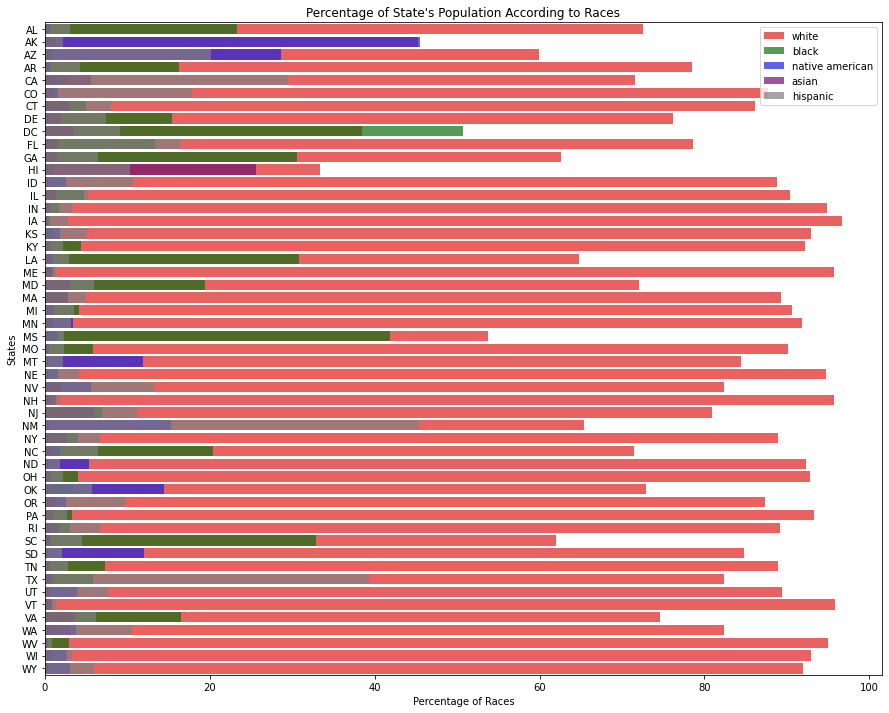

In [32]:
# Visualization
f,ax = plt.subplots(figsize = (15,12))
sns.barplot(x = share_white, y = area_list, color = "red" ,alpha = 0.7 , label = "white")
sns.barplot(x = share_black, y = area_list, color = "green" ,alpha = 0.7 , label = "black")
sns.barplot(x = share_native_american, y = area_list, color = "blue" ,alpha = 0.7 , label = "native american")
sns.barplot(x = share_asian, y = area_list, color = "purple" ,alpha = 0.7 , label = "asian")
sns.barplot(x = share_hispanic, y = area_list, color = "gray" ,alpha = 0.7 , label = "hispanic")
ax.legend(loc = "upper right",frameon = True) # Background transparent or not
ax.set(xlabel  = "Percentage of Races",ylabel = "States",title = "Percentage of State's Population According to Races")

<a id = "3"></a>
# Point Plot

In [33]:
# high school gradution rate vs poverty rate of each state
sorted_data["area_poverty_ratio"] = sorted_data["area_poverty_ratio"]/max(sorted_data["area_poverty_ratio"])
sorted_data2["area_highschool_ratio"] = sorted_data2["area_highschool_ratio"]/max(sorted_data2["area_highschool_ratio"])
data = pd.concat([sorted_data,sorted_data2["area_highschool_ratio"]],axis = 1)
data.sort_values("area_poverty_ratio",inplace = True)

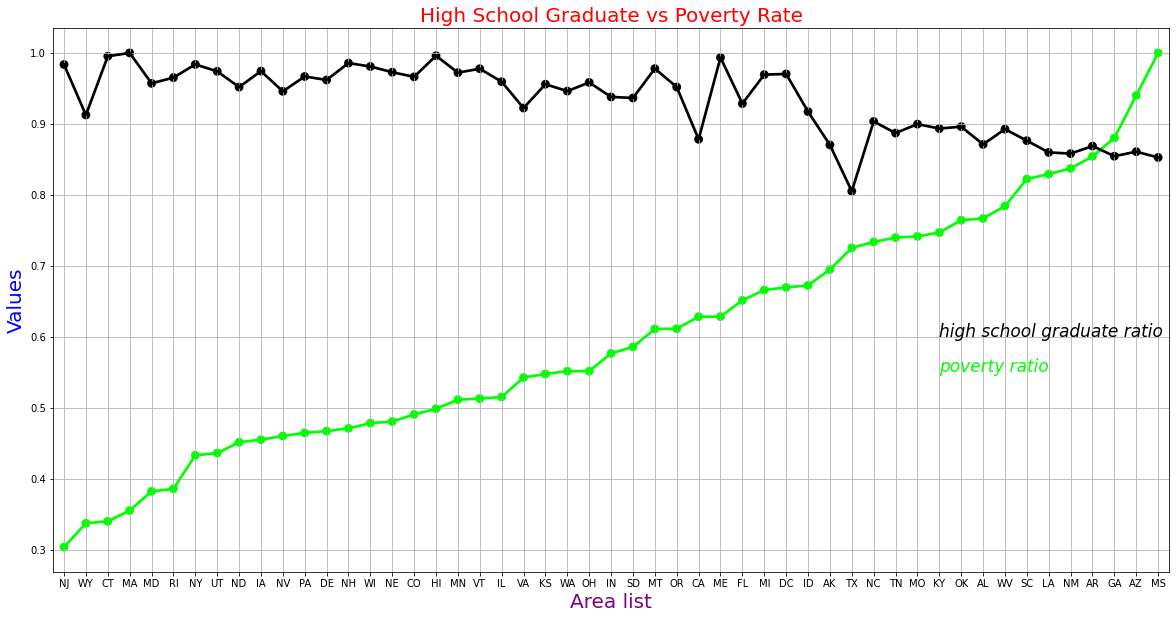

In [34]:
# visualization
f,ax1 = plt.subplots(figsize = (20,10))
sns.pointplot(x = "area_list",y = "area_poverty_ratio",data = data ,color = "lime" , alpha= 0.7)
sns.pointplot(x = "area_list",y = "area_highschool_ratio", data = data , color = "black", alpha = 0.7)
plt.text(40,0.6,"high school graduate ratio",color = "black" , fontsize = 17, style = "italic")
plt.text(40,0.55, "poverty ratio" , color = "lime" , fontsize = 17 , style = "italic")
plt.xlabel("Area list", fontsize = 20 , color = "purple")
plt.ylabel("Values",fontsize = 20, color = "blue")
plt.title("High School Graduate vs Poverty Rate",fontsize = 20 , color = "red")
plt.grid()

<a id = "4"></a>
# Joint Plot

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


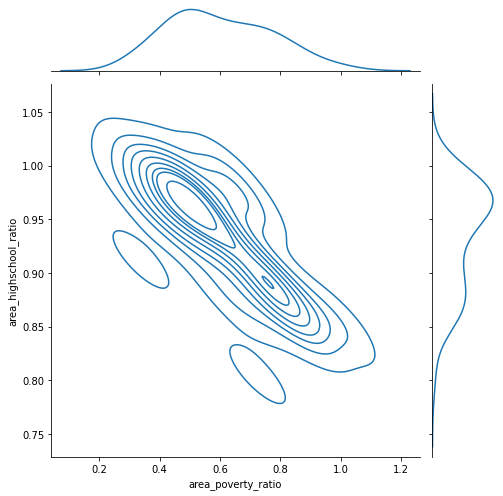

In [35]:
g = sns.jointplot(data.area_poverty_ratio , data.area_highschool_ratio, kind = "kde" , height = 7)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


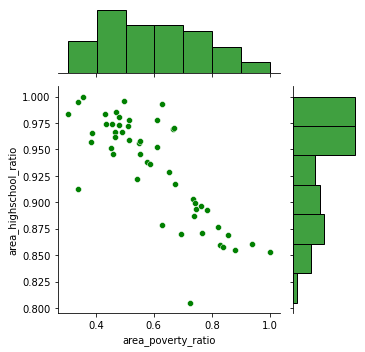

In [36]:
# default scatter               kind : scatter  reg  resid  kde   hex
g = sns.jointplot("area_poverty_ratio" ,"area_highschool_ratio", data = data , height = 5, ratio = 3 , color = "g")

<a id = "5"></a>
# Pie Plot

In [37]:
kill.race.dropna(inplace = True)
labels = kill.race.value_counts().index
colors = ["red","green","blue","black","yellow","purple"]
explode = [0,0,0,0,0,0]
sizes = kill.race.value_counts().values

In [38]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Text(0.5, 1.0, 'Killed People According to Races')

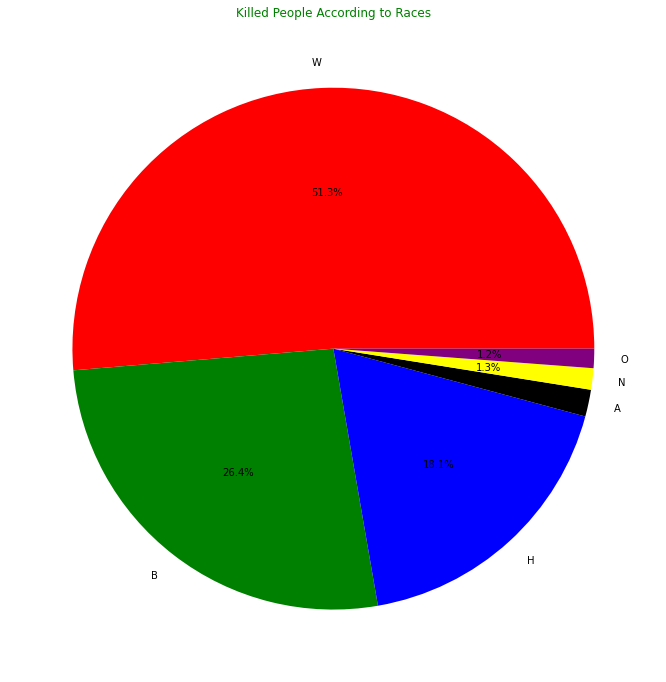

In [39]:
plt.figure(figsize = (15,12))
plt.pie(sizes, explode = explode , labels = labels , colors = colors , autopct ="%1.1f%%")
plt.title("Killed People According to Races" , color = "g" , fontsize = 12 )

<a id = "6"></a>
# Lme Plot

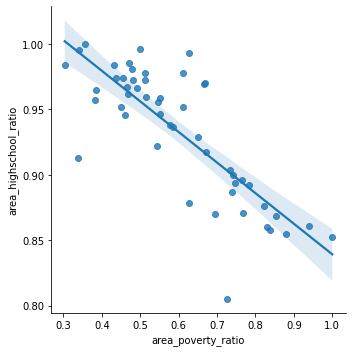

In [40]:
sns.lmplot(x = "area_poverty_ratio" , y = "area_highschool_ratio" , data = data )
plt.show()

<a id = "7"></a>
# Kde Plot

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


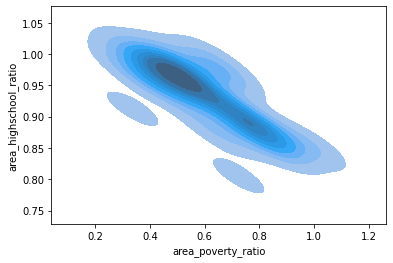

In [41]:
sns.kdeplot(data.area_poverty_ratio,data.area_highschool_ratio , shade = True , cut = 3)
plt.show()

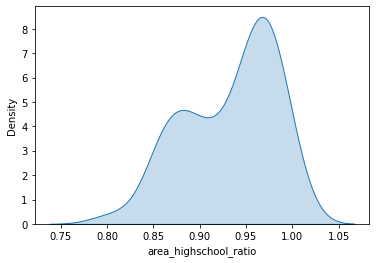

In [42]:
sns.kdeplot(data.area_highschool_ratio , shade = True);

<a id = "8"></a>
# Violin Plot

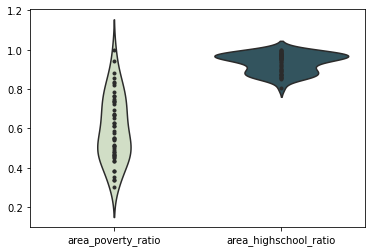

In [43]:
pal = sns.cubehelix_palette(2, rot = -.5 ,dark = .3)
sns.violinplot(data = data , palette = pal , inner = "points" )
plt.show()

<a id = "9"></a>
# Heatmap

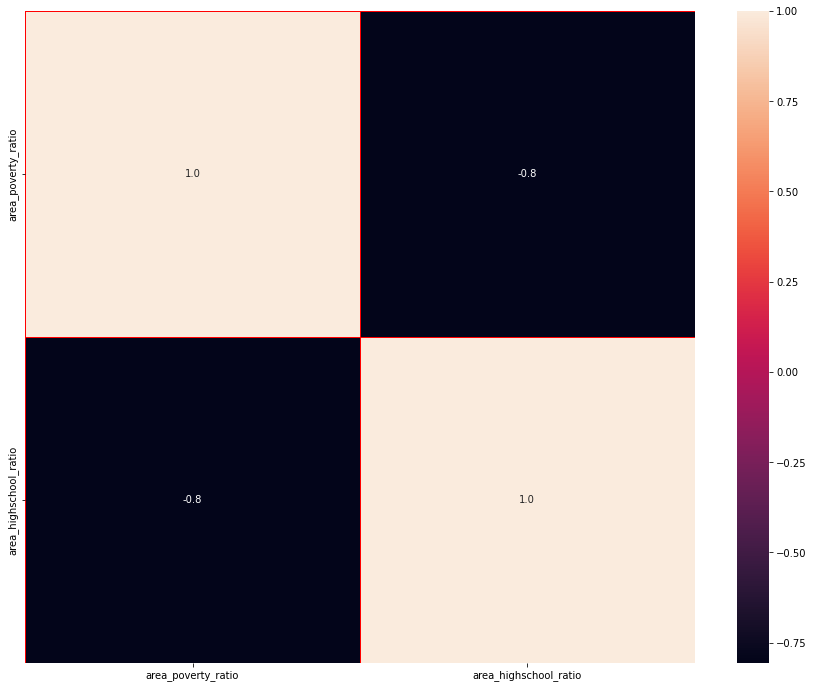

In [44]:
f,ax = plt.subplots(figsize = (15,12))
sns.heatmap(data.corr() , annot = True , linewidth = .5 , linecolor = "r" , fmt = ".1f" , ax = ax)
plt.show()

<a id = "10"></a>
# Box Plot

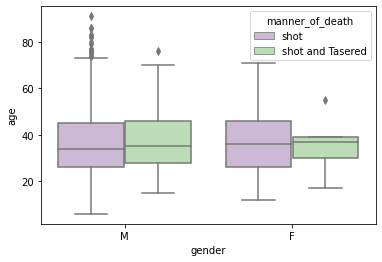

In [45]:
sns.boxplot(x = "gender" , y  ="age" , hue = "manner_of_death" , data = kill , palette = "PRGn")
plt.show()

<a id = "11"></a>

# Swarm Plot

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


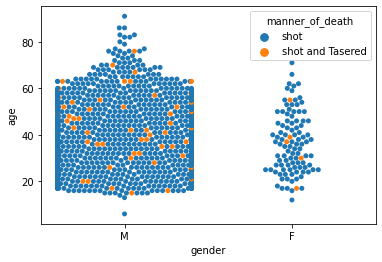

In [46]:
sns.swarmplot(x = "gender" , y = "age" ,  hue = "manner_of_death"  , data = kill)
plt.show()

<a id = "12"></a>

# Pair Plot

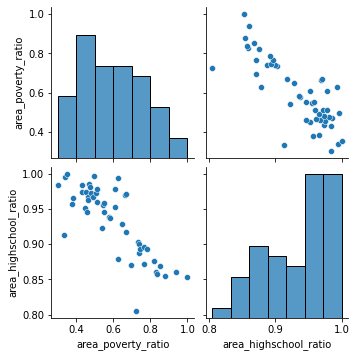

In [47]:
sns.pairplot(data)
plt.show()

<a id = "13"></a>
# Count Plot

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


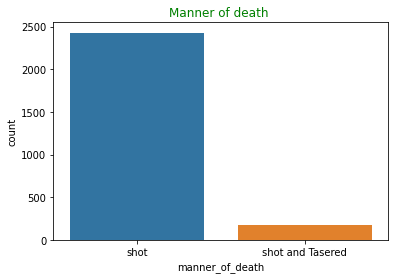

In [48]:
sns.countplot(kill.gender)
sns.countplot(kill.manner_of_death)
plt.title("Manner of death ", color = "g" , fontsize  = 12)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


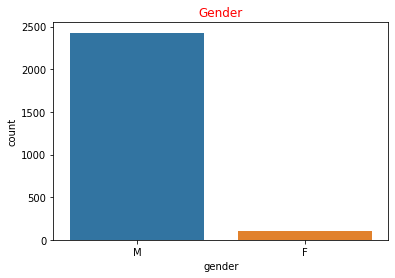

In [49]:
sns.countplot(kill.gender)
plt.title("Gender" , color = "red" , fontsize = 12)
plt.show()

In [50]:
armed  = kill.armed.value_counts()
armed

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: armed, Length: 68, dtype: int64

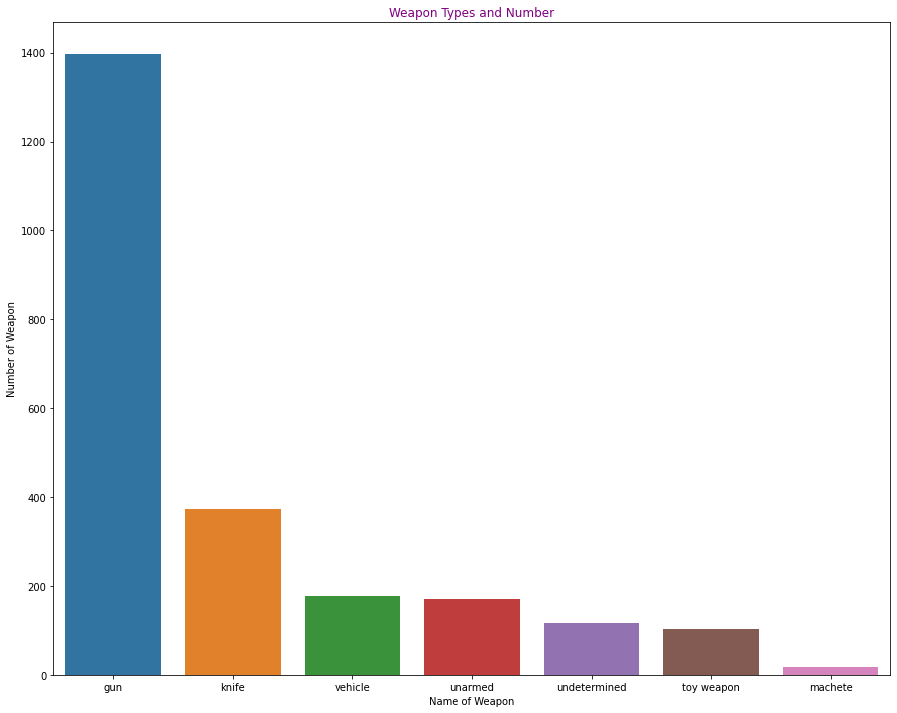

In [51]:
plt.figure(figsize = (15,12))
sns.barplot(x = armed[:7].index , y = armed[:7].values)
plt.ylabel("Number of Weapon")
plt.xlabel("Name of Weapon")
plt.title("Weapon Types and Number" , color = "purple" , fontsize = 12)
plt.show()

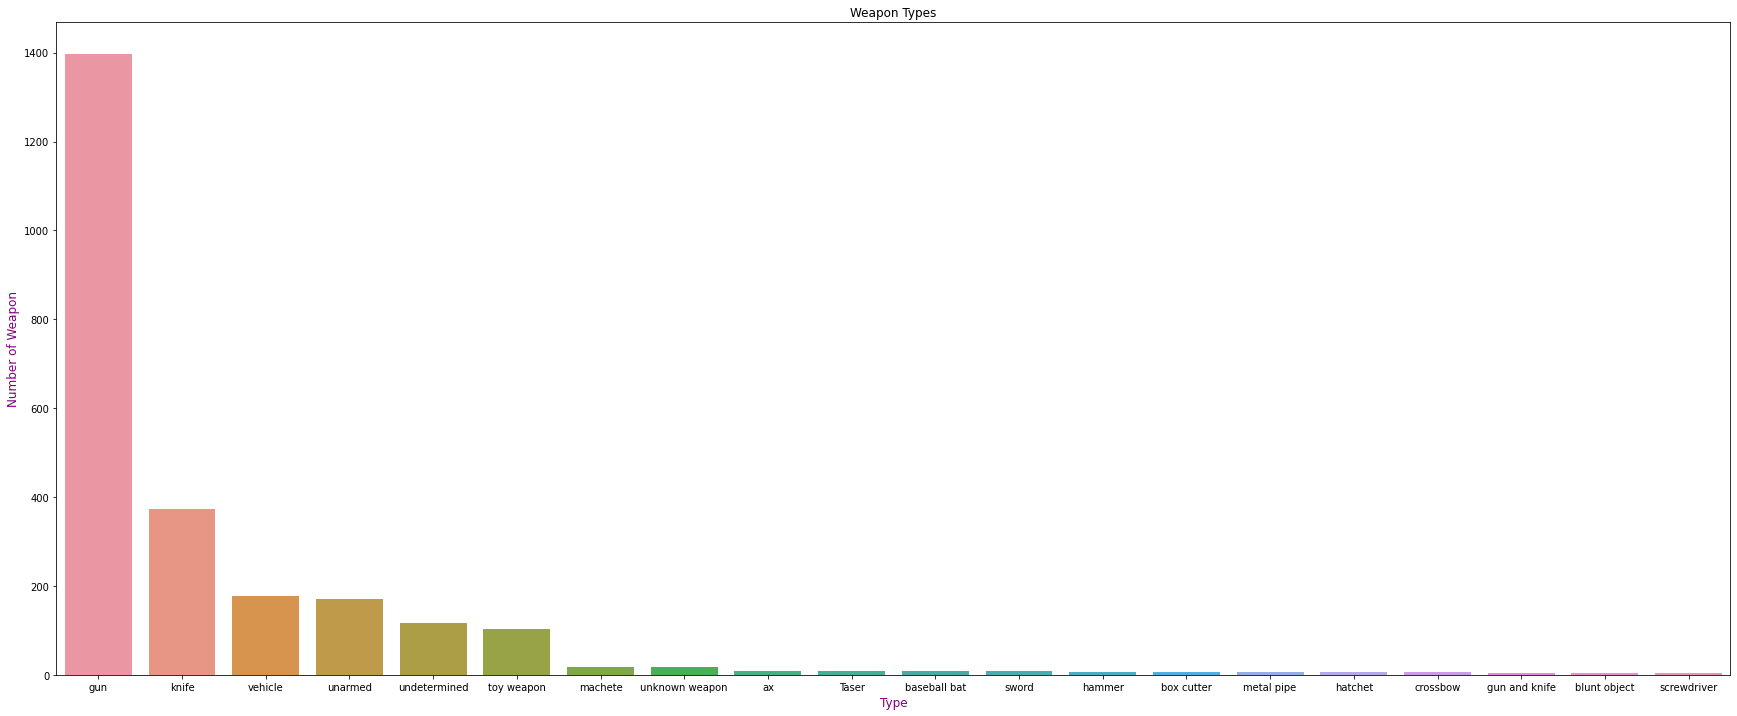

In [52]:
plt.figure(figsize = (30,12))
sns.barplot(x = armed[:20].index , y = armed[:20].values)
plt.ylabel("Number of Weapon" , color = "purple" , fontsize = 12)
plt.xlabel("Type" , color = "purple" , fontsize = 12 )
plt.title("Weapon Types" , fontsize = 12)
plt.show()

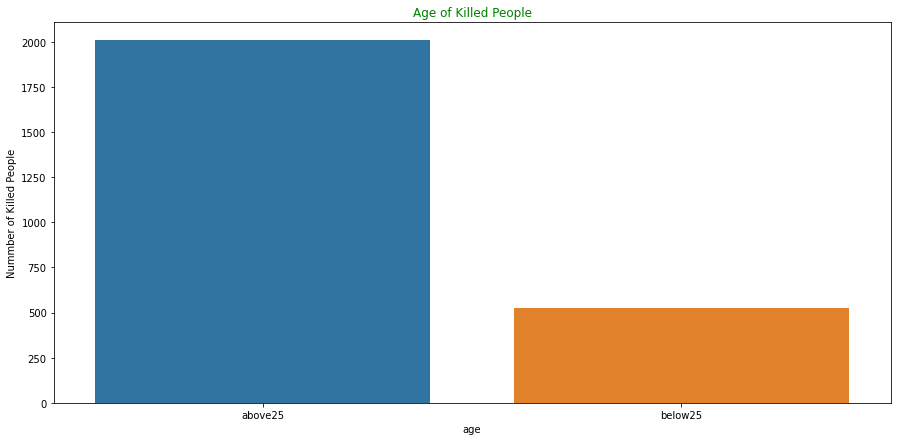

In [53]:
above25 =["above25" if i >= 25 else "below25" for i in kill.age] 
df  = pd.DataFrame({"age": above25})
plt.figure(figsize = (15,7))
sns.countplot(x = df.age)
plt.ylabel("Nummber of Killed People")
plt.title("Age of Killed People", color = "green" , fontsize = 12)
plt.show()

In [54]:
df

,age
0,above25
1,above25
2,below25
3,above25
4,above25
...,...
2530,above25
2531,below25
2532,above25
2533,above25


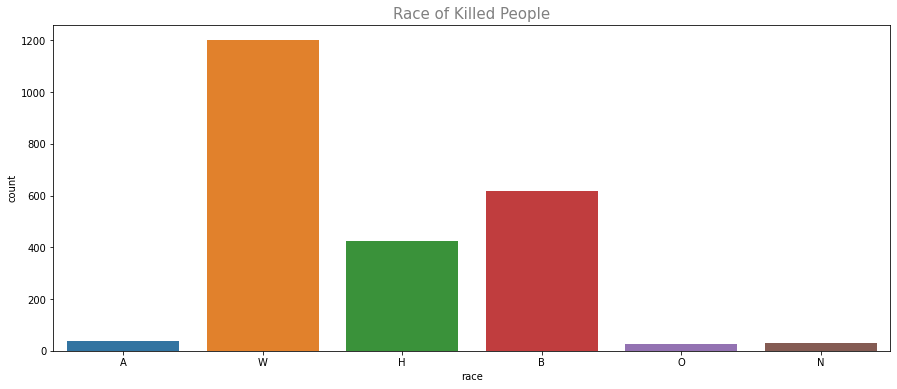

In [55]:
plt.figure(figsize = (15,6))
sns.countplot(data = kill ,x = "race")
plt.title("Race of Killed People" , color = "gray" , fontsize = 15) 
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


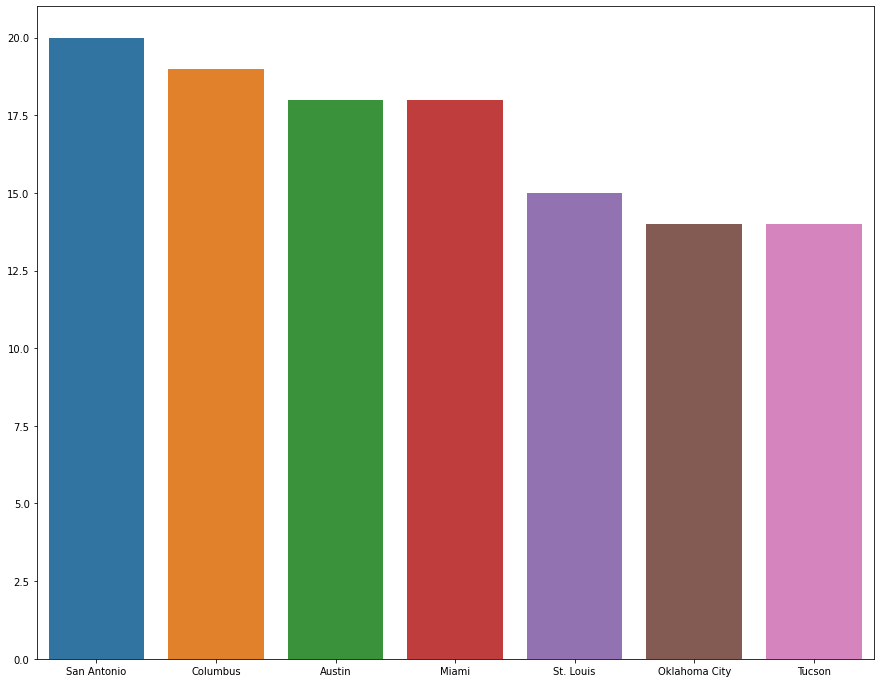

In [56]:
city = kill.city.value_counts()
plt.figure(figsize = (15,12))
sns.barplot(city[5:12].index , city[5:12].values)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


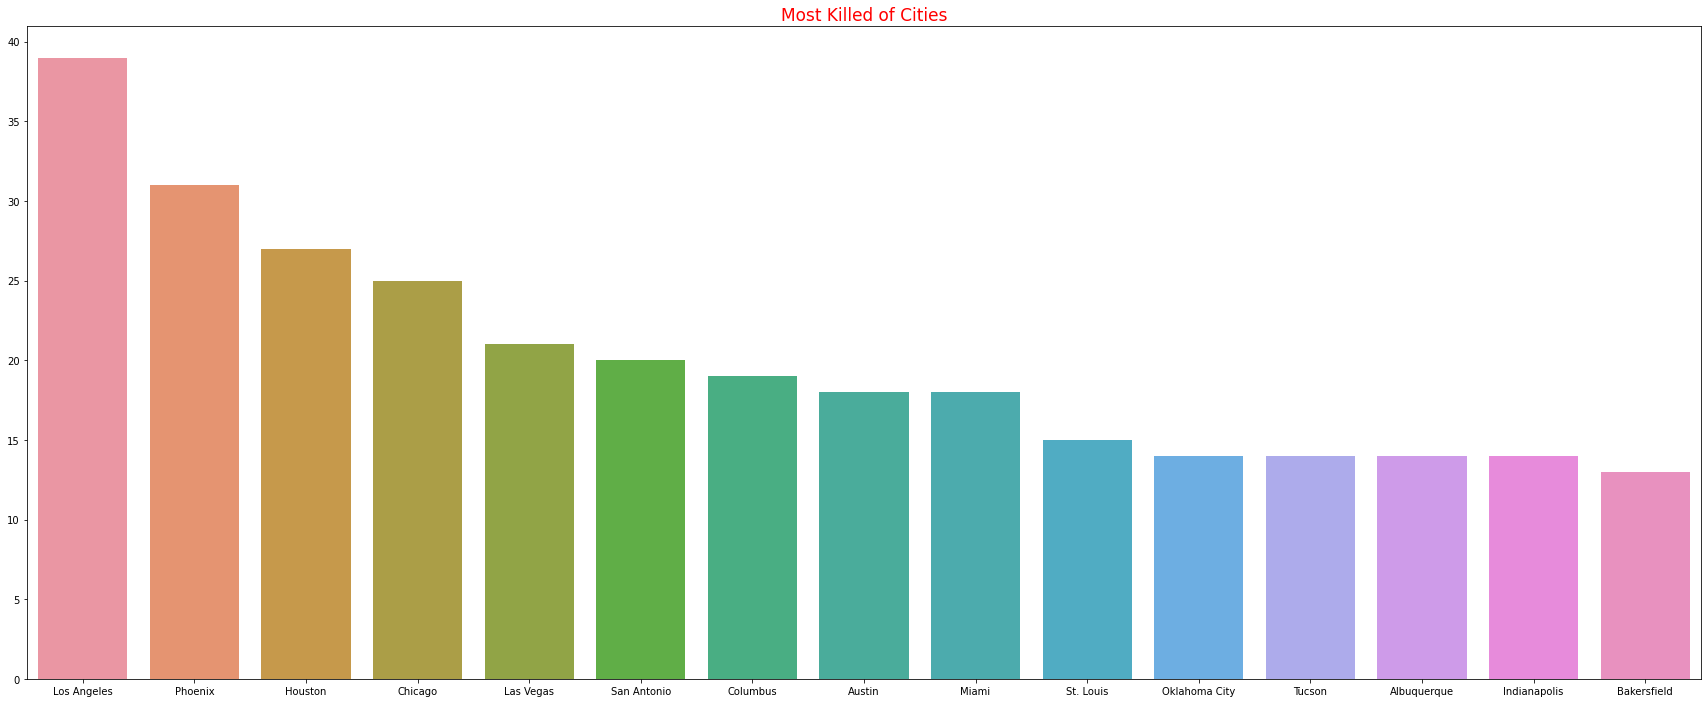

In [57]:
plt.figure(figsize = (30,12))
sns.barplot(city[:15].index , city[:15].values)
plt.title("Most Killed of Cities" , color = "red" , fontsize = 17)
plt.xticks(rotation=0)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


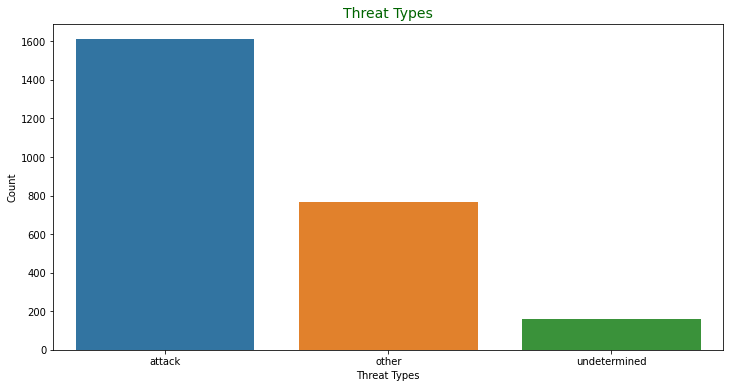

In [58]:
plt.figure(figsize = (12,6))
sns.countplot(kill.threat_level)
plt.xlabel("Threat Types")
plt.ylabel("Count")
plt.title("Threat Types" , color = "darkgreen" , fontsize = 14)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


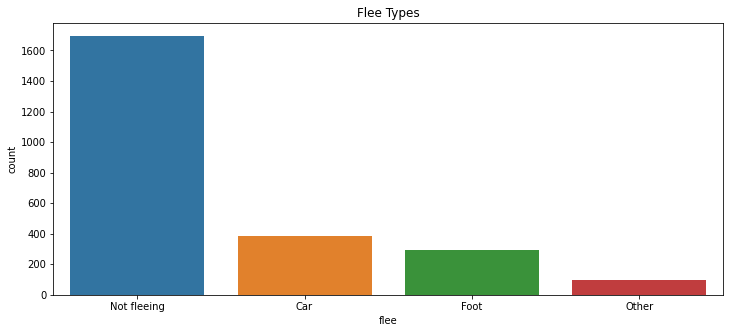

In [59]:
plt.figure(figsize = (12,5))
sns.countplot(kill.flee)
plt.title("Flee Types")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


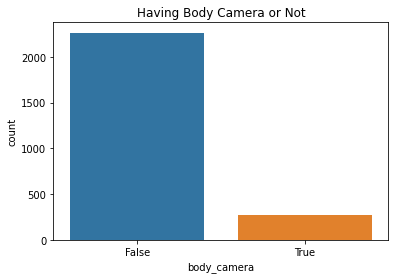

In [60]:
sns.countplot(kill.body_camera)
plt.title("Having Body Camera or Not")
plt.show()

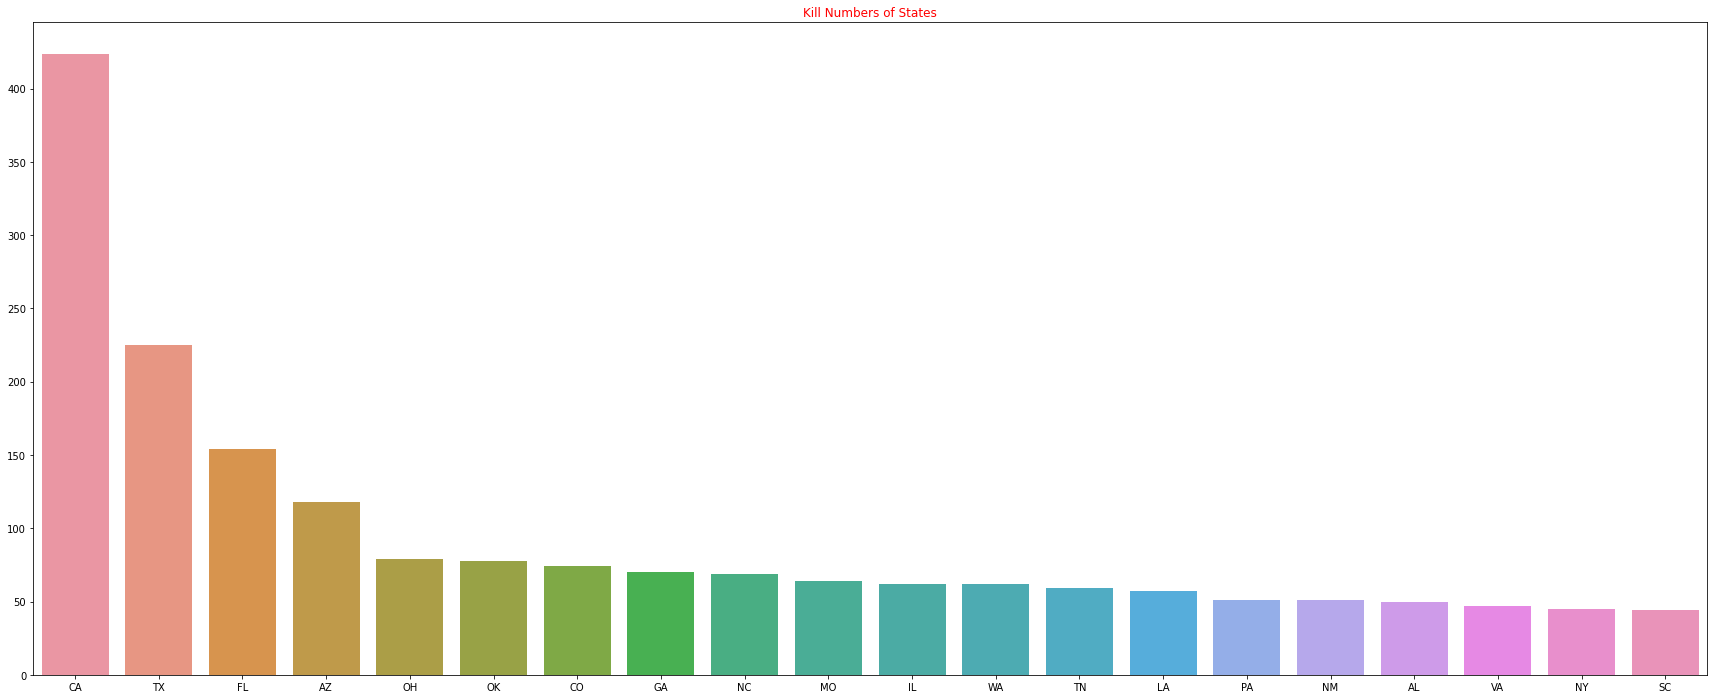

In [61]:
plt.figure(figsize = (30,12))
sta = kill.state.value_counts().index[:20]
sns.barplot(x = sta , y = kill.state.value_counts().values[:20])
plt.title("Kill Numbers of States" , color = "red" , fontsize = 12)
plt.show()

<a id = "14"></a>
# Cat plot

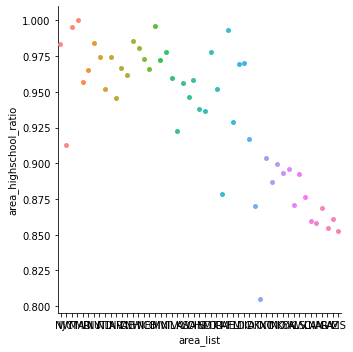

In [62]:
sns.catplot(x = "area_list" , y = "area_highschool_ratio" , data = data)

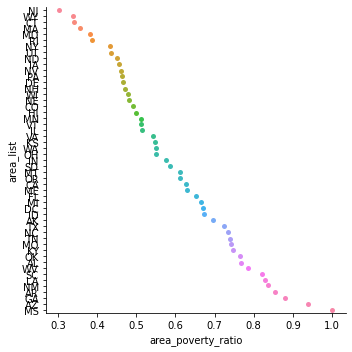

In [63]:
sns.catplot(x = "area_poverty_ratio" , y = "area_list" , data = data)

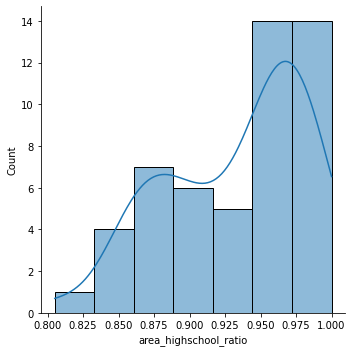

In [64]:
sns.displot(data.area_highschool_ratio , kde = True)

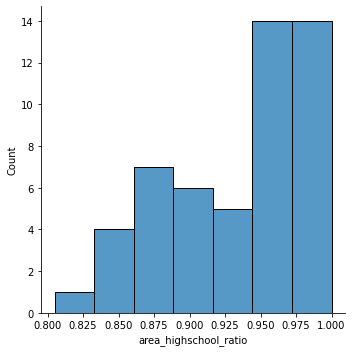

In [65]:
sns.displot(data.area_highschool_ratio , kde = False)

In [66]:
#(sns.FacetGrid(data, hue = "area_poverty_ratio" , height = 5)
#.map(sns.kdeplot , "area_poverty_ratio" , shade = True)
#.add_legend());